# HW04 
## Yun Cheng
### USC ID : 5013-2324-78
### Question 2
### b(i).
Research what types of techniques are usually used for dealing with data with
missing values.
Pick at least one of them and apply it to this data in the
next steps

For example: Mean Imputation,Hot deck imputation,Cold deck imputation,and regression imputation.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
train_data= pd.read_csv('./aps_failure_training_set.csv', 
                    na_values='na', skiprows=20)
test_data = pd.read_csv('./aps_failure_test_set.csv', 
                    na_values='na', skiprows=20)
train_missing=train_data.isnull().sum()
test_missing=test_data.isnull().sum()
missing_summary=pd.DataFrame()
missing_summary['# of missing values from Train data']=train_missing
missing_summary['# of missing values from test data']=test_missing
missing_summary.head(10)

,# of missing values from Train data,# of missing values from test data
class,0,0
aa_000,0,0
ab_000,46329,12363
ac_000,3335,926
ad_000,14861,3981
ae_000,2500,690
af_000,2500,690
ag_000,671,189
ag_001,671,189
ag_002,671,189


As shown above ,we have lots of missing values. An iterative method based on Expectation Maximization can be used. 

In [3]:
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#To speed up transformation, I used 1 nearest features. The best is to use all of the features
imp = IterativeImputer(max_iter=10, random_state=0,n_nearest_features=1)
X_train=train_data.iloc[:,1:]
Y_train=train_data.iloc[:,0]
X_test=test_data.iloc[:,1:]
Y_test=test_data.iloc[:,0]

In [4]:
X_train_imp=imp.fit_transform(X_train)
X_train_imp_pd=pd.DataFrame(data=X_train_imp,columns=train_data.columns[1:])
X_test_imp=imp.fit_transform(X_test)
X_test_imp_pd=pd.DataFrame(data=X_test_imp,columns=test_data.columns[1:])

### b(ii).
For each of the 170 features, calculate the coefficient of variation
CV
=
s/m
,
where
s
is sample standard deviation and
m
is sample mean.

In [5]:
new_feature=pd.concat([X_test_imp_pd,X_train_imp_pd])

In [6]:
feature_mean=new_feature.mean(axis = 0) 
feature_std=new_feature.std(axis = 0)
CV=feature_std/feature_mean
CV_sort = pd.Series.sort_values(CV, ascending=False)
CV_sort

cf_000    207.320273
co_000    206.939767
ad_000    206.781120
cs_009    193.569355
dj_000    114.969910
as_000    113.836007
df_000     96.180283
dh_000     94.460302
ag_000     91.705562
au_000     85.873457
ay_009     80.583365
az_009     78.005034
cs_008     57.535973
ay_001     49.218972
ch_000     47.843294
ef_000     47.629444
eg_000     44.060687
dz_000     43.488082
aj_000     43.059388
ag_001     42.444160
ay_000     40.908644
ay_002     38.315107
ak_000     34.737127
ay_004     33.094486
dl_000     32.271927
ag_009     32.245777
cn_009     31.142850
ea_000     30.751355
ay_003     28.389775
cn_000     28.127986
             ...    
ag_006      2.352274
cn_005      2.338508
ds_000      2.336041
dt_000      2.321362
bg_000      2.318783
ah_000      2.316649
ao_000      2.283417
an_000      2.259262
ed_000      2.249386
ce_000      2.168569
ac_000      2.144098
ab_000      2.141783
do_000      2.141153
cs_006      2.101259
dp_000      2.079157
cs_000      1.977048
dc_000      1

### b(iii).
Plot a correlation matrix for your features using pandas or any other tool

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

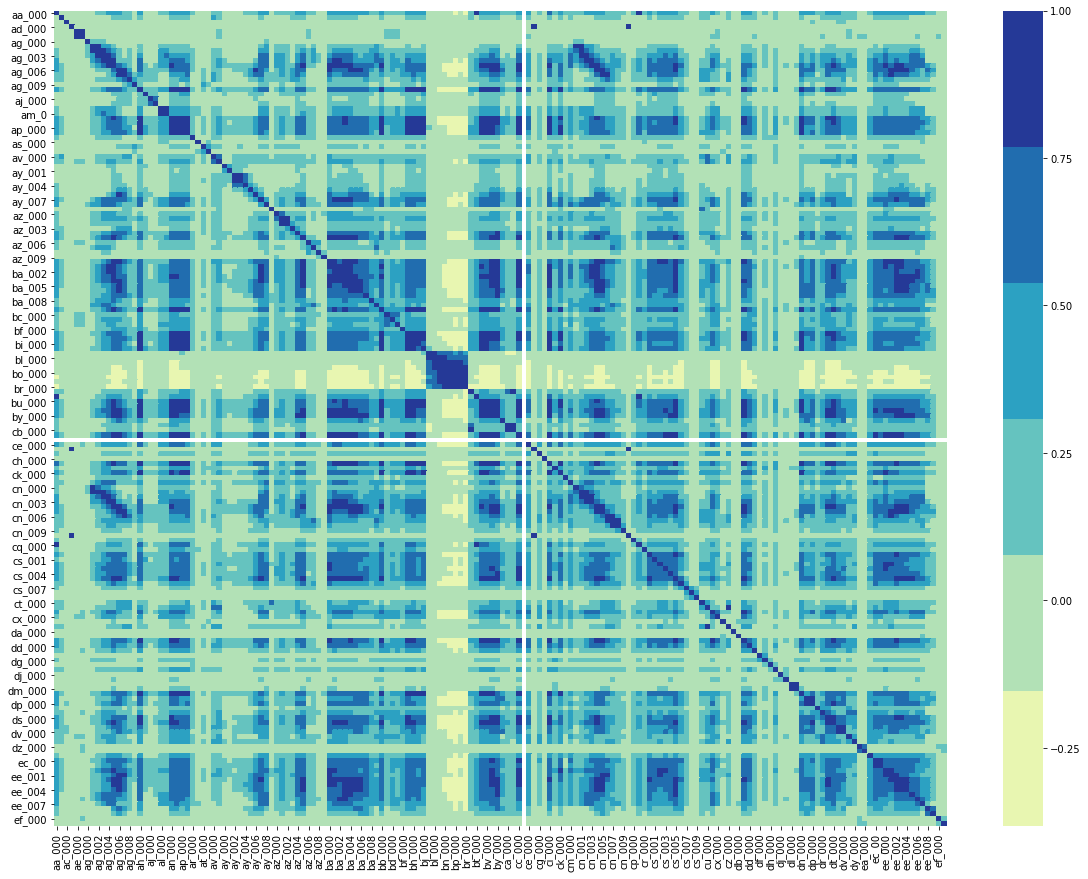

In [8]:
corrMatrix=new_feature.corr()
fig = plt.figure(figsize=(20, 15))
sns.heatmap(corrMatrix, annot=False,cmap=sns.color_palette("YlGnBu"))
plt.show()

### b(iv).
Pick
b
√
170features with highest
CV
, and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
significance of those features, just by the scatter plots? This does not mean
that you will only use those features in the following questions. We picked
them only for visualization.

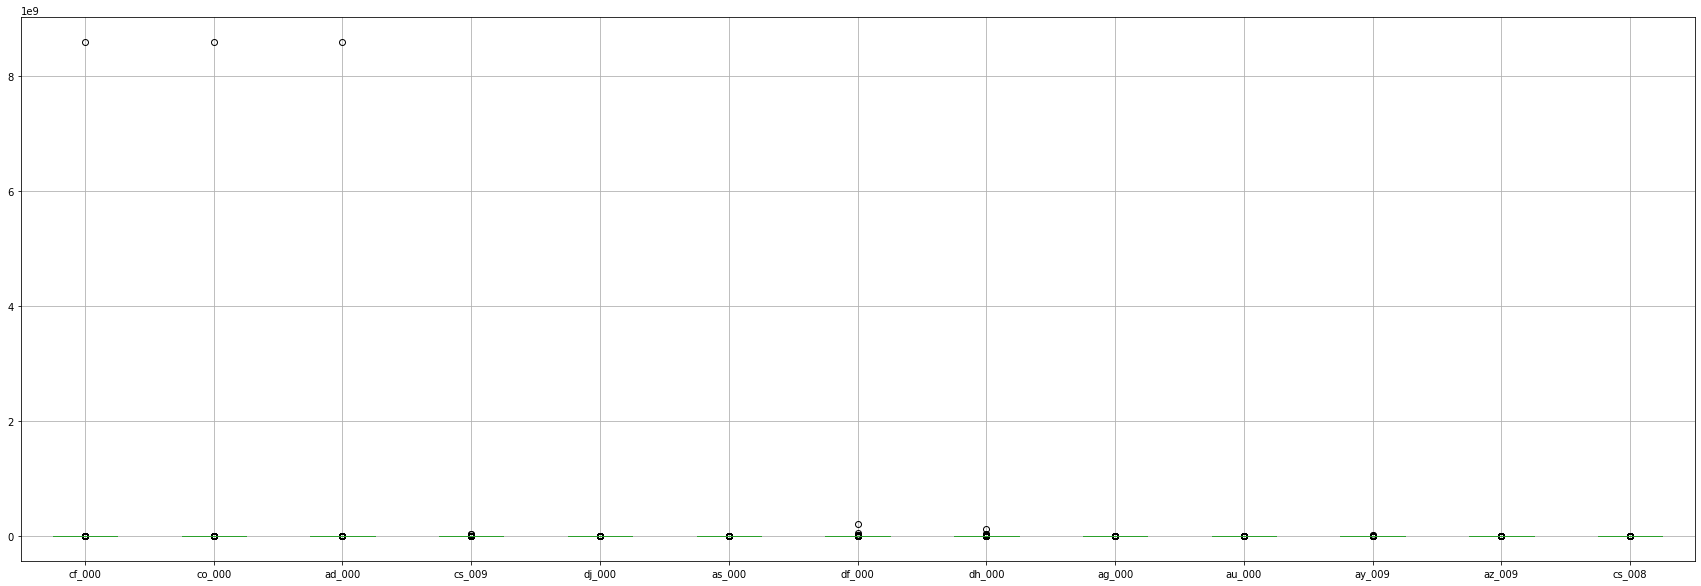

In [9]:
from math import sqrt, floor
number_features = floor(sqrt(170))
Sort=CV_sort[:number_features]
Sort_column_name=list(Sort.index)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 10))
gs=new_feature.boxplot(Sort_column_name)
#plt.ylim([-3, 10])#zoom in for details

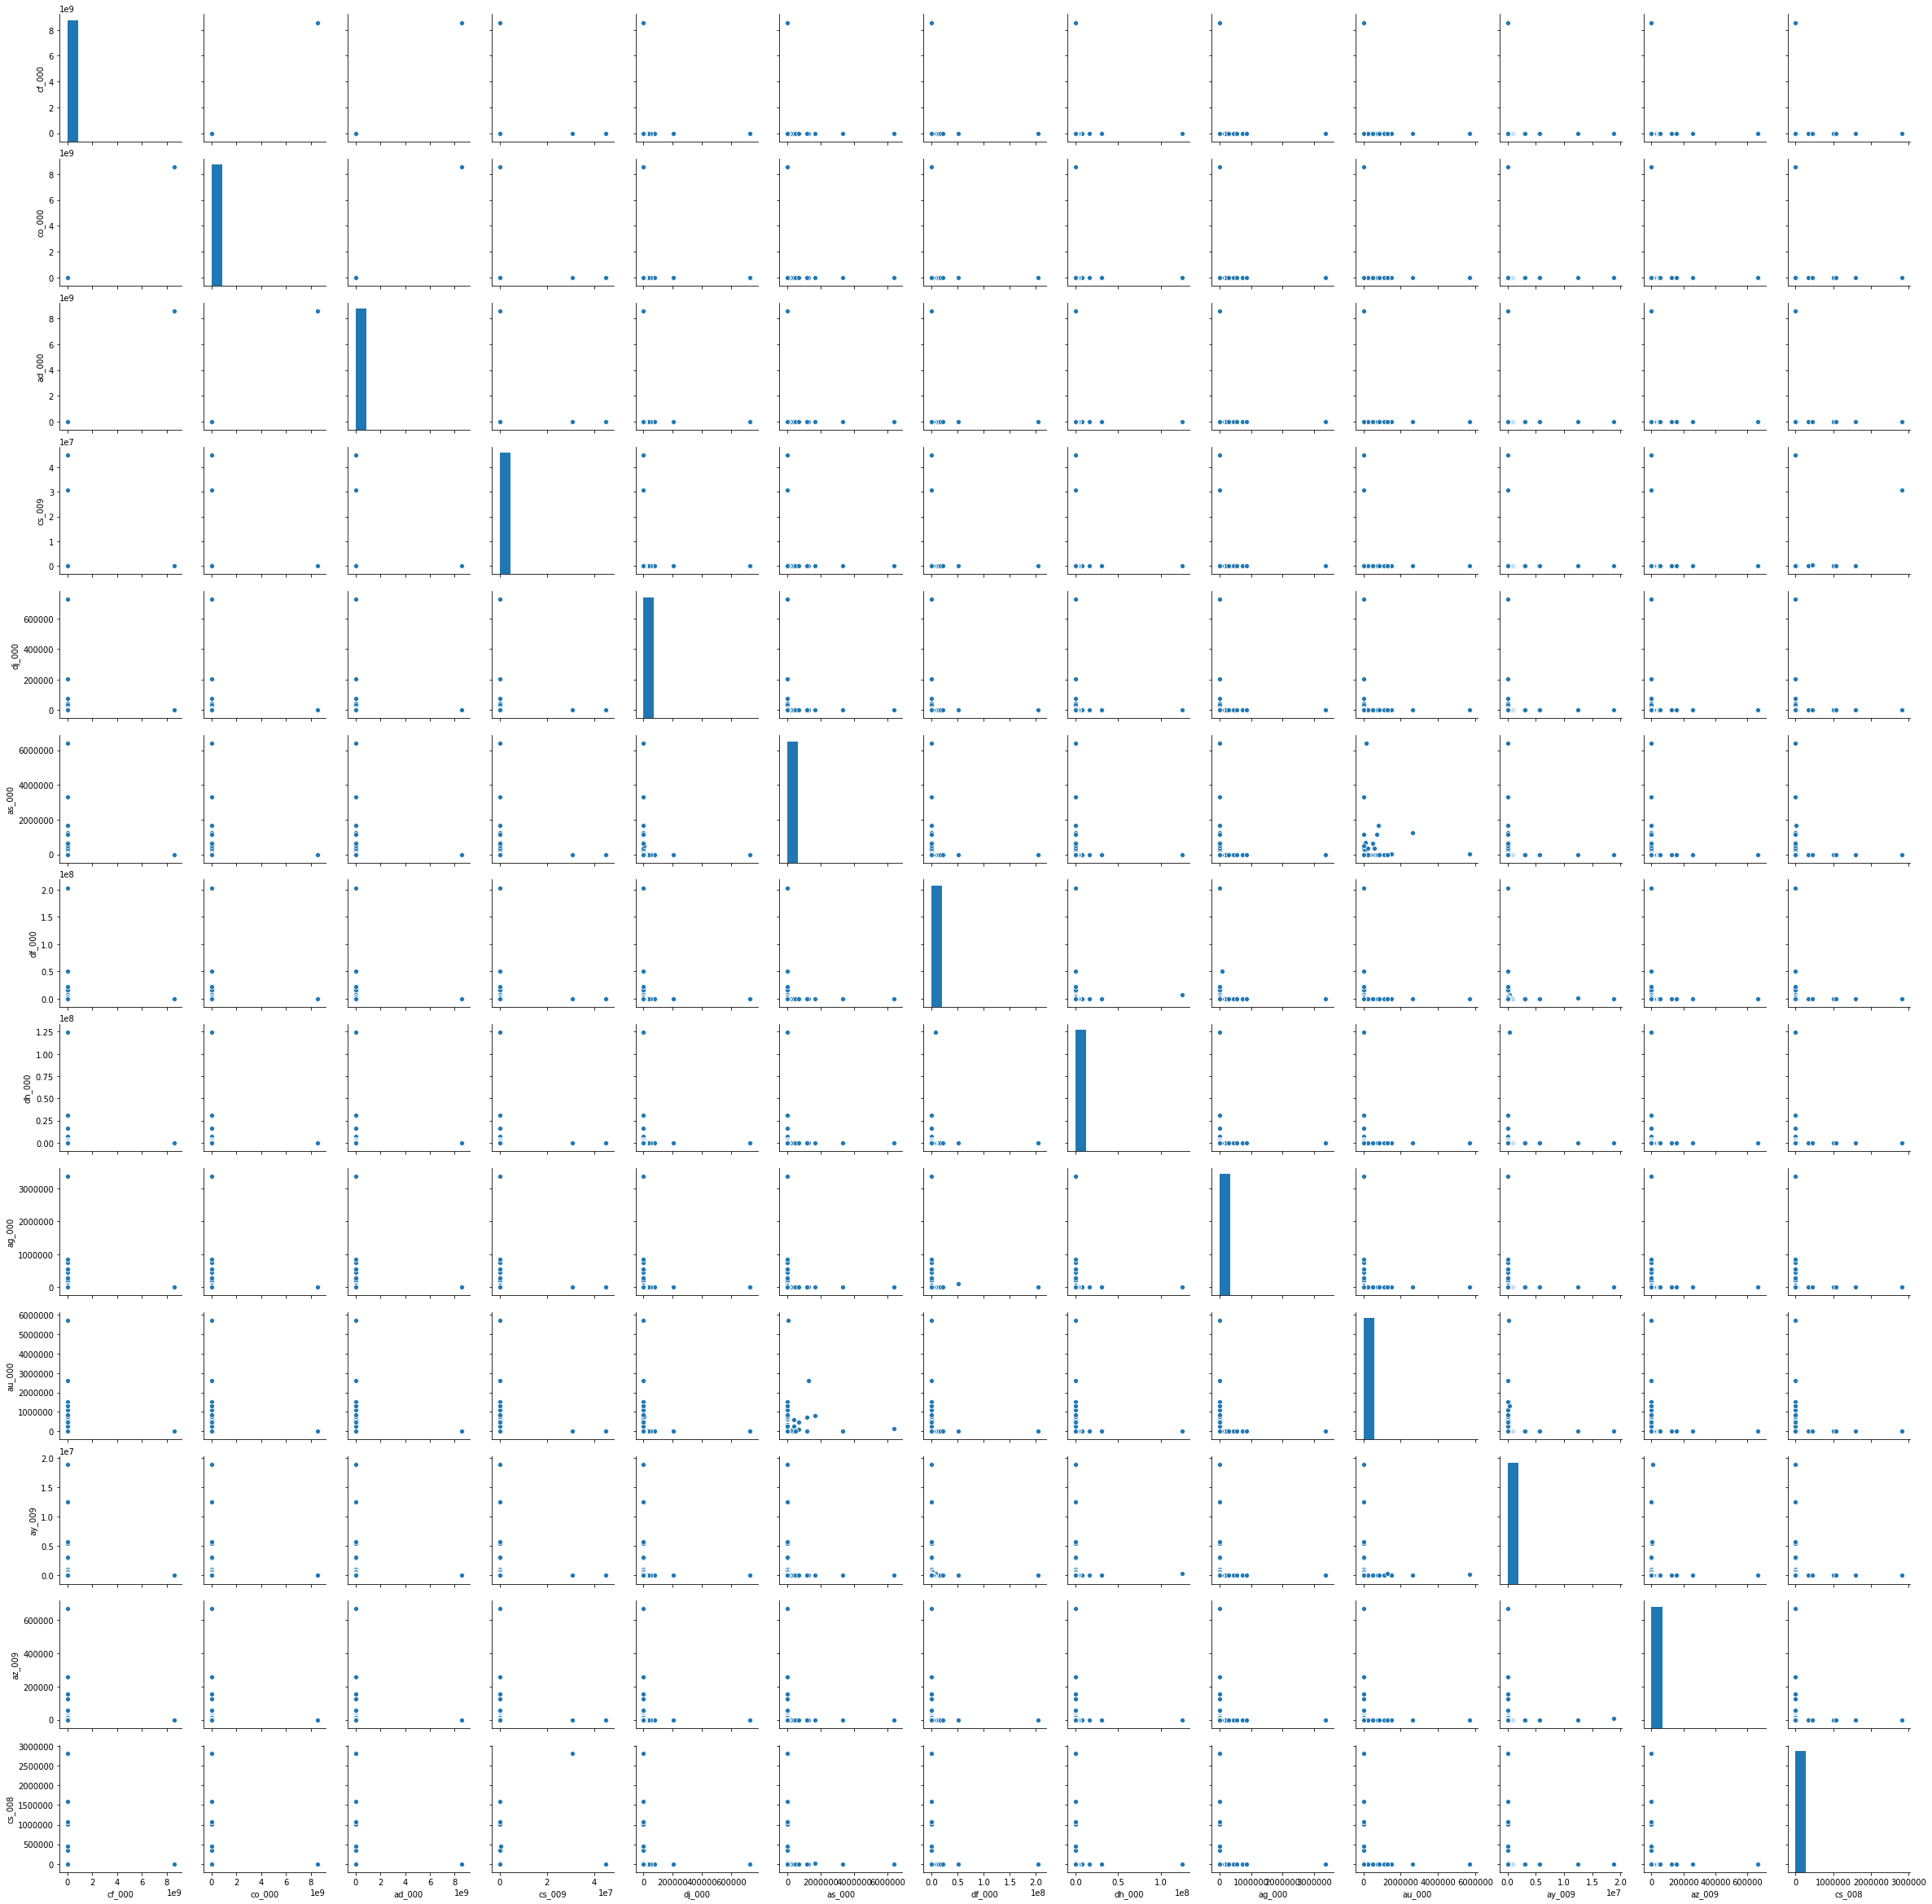

In [10]:
e_data=new_feature[Sort_column_name]
g=sns.pairplot(e_data)

By scatter plot, we are not directly draw conclusion about mean values,but we can get a little sense of std by looking at how dots scattering. By boxplot, we can directly see the outliers of each features. For example, "cf_000" has higherst Coeff. of CV, this is because it has outliers that far from majority of data points. Those outliers contributes higher standard variation, and later on rises the Coeff. of CV

### b(v).
Determine the number of positive and negative data. Is this data set imbalanced?

In [11]:
Y_train.value_counts()+Y_test.value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

Yes, it is imbalanced.

### (c)
Train a random forest to classify the data set. Do NOT compensate for class
imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and
misclassification for training and test sets and report them (You may use pROC
package). Calculate Out of Bag error estimate for your random forset and compare
it to the test error

In [12]:
Y_whole=pd.concat([Y_train,Y_test])

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
Y_train_binary= label_encoder.fit_transform(Y_train) 
Y_test_binary= label_encoder.fit_transform(Y_test) 


In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight=None,random_state=0,n_jobs=-1,oob_score=True).fit(X_train_imp, Y_train_binary)
Y_rf_predict=clf.predict(X_test_imp)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_binary, Y_rf_predict)

array([[15607,    18],
       [  110,   265]])

Text(0, 0.5, 'True Postive')

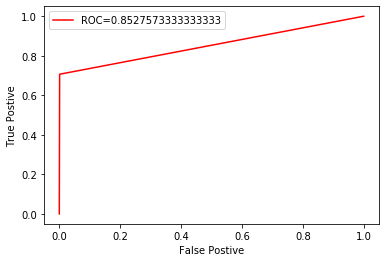

In [14]:
from sklearn.metrics import roc_curve, auc
FP, TP, thresholds = roc_curve(Y_test_binary,Y_rf_predict)
area = auc(FP, TP)
import matplotlib.pyplot as plt
plt.plot(FP,TP, color='red', label='ROC='+str(area))
plt.legend()
plt.xlabel('False Postive')
plt.ylabel('True Postive')

In [15]:
from sklearn.metrics import mean_squared_error
Test_error_rf=mean_squared_error(Y_test_binary, Y_rf_predict)
print('Random Forest error is: '+ str(Test_error_rf))
print('Out of bag error by imbalanced random forest is '+str(clf.oob_score_))

Random Forest error is: 0.008
Out of bag error by imbalanced random forest is 0.9936333333333334


### (d) 
Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

A useful setting from RandomForestClassifier is class_weight=balanced where in classes are automatically weighted inversely proportional to how frequently they appear in the data. The equation is : n_samples / (n_classes * np.bincount(y))
Citation: https://chrisalbon.com/machine_learning/trees_and_forests/handle_imbalanced_classes_in_random_forests/

In [16]:
clf_weight = RandomForestClassifier( class_weight='balanced',
                                    random_state=0,
                                    n_jobs=-1,
                                    oob_score=True).fit(X_train_imp, Y_train_binary)

In [17]:
Y_wrf_predict=clf_weight.predict(X_test_imp)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test_binary, Y_wrf_predict)

array([[15616,     9],
       [  194,   181]])

Text(0, 0.5, 'True Postive')

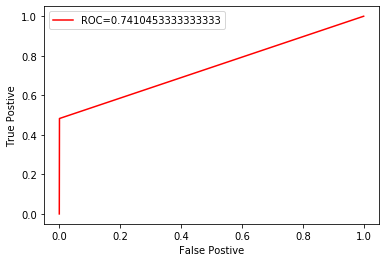

In [18]:
from sklearn.metrics import roc_curve, auc
FP_w, TP_w, thresholds_w = roc_curve(Y_test_binary,Y_wrf_predict)
area_w = auc(FP_w, TP_w)
import matplotlib.pyplot as plt
plt.plot(FP_w,TP_w, color='red', label='ROC='+str(area_w))
plt.legend()
plt.xlabel('False Postive')
plt.ylabel('True Postive')

In [19]:
from sklearn.metrics import mean_squared_error
Test_error_wrf=mean_squared_error(Y_test_binary, Y_wrf_predict)
print('Random Forest error is: '+ str(Test_error_wrf))
print('Out of bag error by balanced random forest is '+str(clf_weight.oob_score_))

Random Forest error is: 0.0126875
Out of bag error by balanced random forest is 0.9922333333333333


When with imbalanced random forest, the prediction is typically measured with Gini or entropy, and it can be biased so that the minority class is favored,causing some false positive for the majority class. As applied balanced random forest, the the false postive is obivous decreased (from 24 to 8) by looking at the confusion matrix. On the other hand, the out of bag error by balanced random forest is lower than imbalanced one. 

# Continue HW04 Part3.ipynb for more answers